In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical



In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



In [5]:
# Build the ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [6]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8822 - loss: 0.4124 - val_accuracy: 0.9629 - val_loss: 0.1193
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9658 - loss: 0.1127 - val_accuracy: 0.9608 - val_loss: 0.1197
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9773 - loss: 0.0733 - val_accuracy: 0.9706 - val_loss: 0.0938
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9842 - loss: 0.0511 - val_accuracy: 0.9712 - val_loss: 0.0915
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9871 - loss: 0.0395 - val_accuracy: 0.9786 - val_loss: 0.0731
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9893 - loss: 0.0329 - val_accuracy: 0.9742 - val_loss: 0.0879
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9909 - loss: 0.0262 - val_accuracy: 0.9777 - val_loss: 0.0821
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9935 - loss: 0.0196 - 

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9766 - loss: 0.0996
Test accuracy: 0.9793000221252441


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step


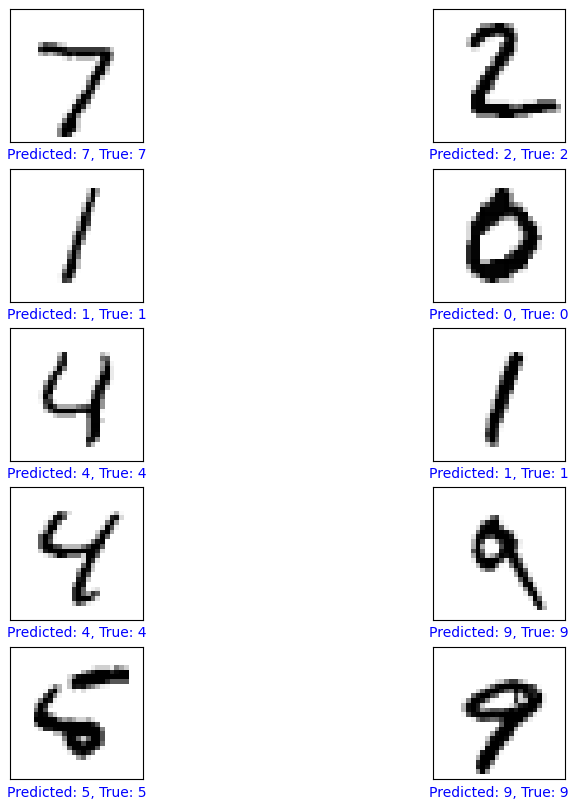

In [8]:
import matplotlib.pyplot as plt

# Predict the labels for the test set
predictions = model.predict(x_test)

# Plot the first 10 test images, their predicted labels, and the true labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = y_test[i].argmax()
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Predicted: {predicted_label}, True: {true_label}", color=color)
plt.show()